## load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, auc, roc_curve

## load data

In [2]:
train_data=pd.read_csv("train_data.csv")

In [3]:
train_data.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [4]:
train_data.isna().sum()

name                  0
brand                 0
categories            0
primaryCategories     0
reviews.date          0
reviews.text          0
reviews.title        10
sentiment             0
dtype: int64

In [5]:
test_data=pd.read_csv("test_data.csv")

In [6]:
test_data.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!


## WEEK 1 TASKS

In [7]:
test_data.isna().sum()

name                 0
brand                0
categories           0
primaryCategories    0
reviews.date         0
reviews.text         0
reviews.title        3
dtype: int64

In [8]:
test_data_hidden=pd.read_csv("test_data_hidden.csv")

In [9]:
test_data_hidden.isna().sum()

name                 0
brand                0
categories           0
primaryCategories    0
reviews.date         0
reviews.text         0
reviews.title        3
sentiment            0
dtype: int64

In [10]:
train_data['sentiment'].value_counts()

Positive    3749
Neutral      158
Negative      93
Name: sentiment, dtype: int64

In [11]:
test_data_hidden['sentiment'].value_counts()

Positive    937
Neutral      39
Negative     24
Name: sentiment, dtype: int64

In [12]:
tf_idf=TfidfVectorizer()

## so here test data dont have target variable and for both train and test hidden data has target variable so we combine these both as master data

In [13]:
master_data=pd.concat([train_data,test_data_hidden])

In [14]:
master_data=master_data.reset_index(drop=True)

In [15]:
master_data.shape

(5000, 8)

In [16]:
master_data.isna().sum()

name                  0
brand                 0
categories            0
primaryCategories     0
reviews.date          0
reviews.text          0
reviews.title        13
sentiment             0
dtype: int64

In [17]:
master_data.dropna(inplace=bool(1))

In [18]:
master_data.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [19]:
master_data['sentiment'].value_counts()

Positive    4673
Neutral      197
Negative     117
Name: sentiment, dtype: int64

In [20]:
X=tf_idf.fit_transform(master_data['reviews.text'])
X=X.toarray()

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,master_data['sentiment'], test_size=0.3,random_state=43)

In [22]:
naive=MultinomialNB()

In [23]:
naive.fit(x_train,y_train)

MultinomialNB()

In [24]:
y_pred=naive.predict(x_test)

In [26]:
print(classification_report(y_pred, y_test, zero_division='warn'))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         0
     Neutral       0.00      0.00      0.00         0
    Positive       1.00      0.94      0.97      1497

    accuracy                           0.94      1497
   macro avg       0.33      0.31      0.32      1497
weighted avg       1.00      0.94      0.97      1497



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
tf_test_data=tf_idf.transform(test_data['reviews.text'])
tf_test_data=tf_test_data.toarray()

In [22]:
tf_idf2=TfidfVectorizer()

In [23]:
X1=tf_idf2.fit_transform(master_data['reviews.title'])
X1=X1.toarray()

In [24]:
X=pd.DataFrame(X)
X1=pd.DataFrame(X1)

In [25]:
X.shape, X1.shape

((4987, 5401), (4987, 1392))

In [32]:
y_test_value=naive.predict(tf_test_data)

In [33]:
new_test_data=test_data

In [34]:
new_test_data['predicted_sentiment']=y_test_value

In [35]:
new_test_data.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,predicted_sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive


In [26]:
XX=pd.concat([X, X1], axis=1)

In [27]:
XX.shape

(4987, 6793)

## using smote to balance data

In [28]:
sm=SMOTE(random_state=43)

In [29]:
X_sm, y_sm=sm.fit_resample(X,master_data['sentiment'])

In [163]:
y_sm

0        Positive
1        Positive
2         Neutral
3        Positive
4        Positive
           ...   
14014     Neutral
14015     Neutral
14016     Neutral
14017     Neutral
14018     Neutral
Name: sentiment, Length: 14019, dtype: object

In [31]:
y_sm.value_counts()

Positive    4673
Negative    4673
Neutral     4673
Name: sentiment, dtype: int64

## Data splitting with 70 30 ratio

In [32]:
x_train_sm,x_test_sm,y_train_sm,y_test_sm=train_test_split(X_sm,y_sm, test_size=0.3,random_state=43)

## 1st model naive bayes

In [41]:
naive_sm=MultinomialNB()

In [42]:
naive_sm.fit(x_train_sm, y_train_sm)

MultinomialNB()

In [43]:
y_pred_sm=naive_sm.predict(x_test_sm)

In [44]:
y_pred_prob_naive=naive_sm.predict_proba(x_test_sm)

In [45]:
print(classification_report(y_pred_sm, y_test_sm))

              precision    recall  f1-score   support

    Negative       0.99      0.97      0.98      1428
     Neutral       0.99      0.93      0.96      1527
    Positive       0.90      0.98      0.94      1251

    accuracy                           0.96      4206
   macro avg       0.96      0.96      0.96      4206
weighted avg       0.96      0.96      0.96      4206



In [46]:
print(confusion_matrix(y_pred_sm, y_test_sm))

[[1389    0   39]
 [   0 1422  105]
 [   9   11 1231]]


## 2nd model random forest classifier

In [47]:
rf_sm=RandomForestClassifier(n_jobs=-1)

In [48]:
rf_sm.fit(x_train_sm, y_train_sm)

RandomForestClassifier(n_jobs=-1)

In [49]:
y_pred_sm_rf=rf_sm.predict(x_test_sm)

In [50]:
y_pred_prob_rf=rf_sm.predict_proba(x_test_sm)

In [51]:
print(classification_report(y_pred_sm_rf, y_test_sm))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      1395
     Neutral       0.99      1.00      0.99      1424
    Positive       1.00      0.99      0.99      1387

    accuracy                           0.99      4206
   macro avg       0.99      0.99      0.99      4206
weighted avg       0.99      0.99      0.99      4206



In [52]:
print(confusion_matrix(y_pred_sm_rf, y_test_sm))

[[1394    0    1]
 [   0 1420    4]
 [   4   13 1370]]


## 3rd model xgboost classifier

In [53]:
xgcl=XGBClassifier(n_jobs=-1)

In [36]:
y_sm_le=le.fit_transform(y_sm)

In [37]:
x_train_sm,x_test_sm,y_train_sm_le,y_test_sm_le=train_test_split(X_sm,y_sm_le, test_size=0.3,random_state=43)

In [57]:
xgcl.fit(x_train_sm, y_train_sm_le)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [58]:
y_pred_xgb=xgcl.predict(x_test_sm)

In [59]:
print(classification_report(y_pred_xgb, y_test_sm_le))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1400
           1       0.99      0.99      0.99      1434
           2       0.98      0.99      0.98      1372

    accuracy                           0.99      4206
   macro avg       0.99      0.99      0.99      4206
weighted avg       0.99      0.99      0.99      4206



In [60]:
print(confusion_matrix(y_pred_xgb, y_test_sm_le))

[[1393    1    6]
 [   0 1417   17]
 [   5   15 1352]]


## auc and roc curve for xgcl

In [34]:
y_test_binarize=label_binarize(y_test_sm, classes=np.unique(y_test_sm))

In [63]:
y_pred_prob_xgcl=xgcl.predict_proba(x_test_sm)

In [72]:
'''fpr={}
tpr={}
roc_auc=dict()
n_class=y_test_binarize.shape[1]
for i in range(n_class):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarize[:, i], y_pred_prob_xgcl[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    #plt.plot(fpr[i], tpr[i], linestyle="--", color="darkorange")
    plt.plot(fpr[i], tpr[i], linestyle="--", label="%s and ROC curve (area = %0.2f)" %(n_class[i],roc_auc[i]))
    plt.xlim([-0.09, 1.0])
    plt.ylim([0.0, 1.05])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarize.ravel(), y_pred_prob_xgcl.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])'''


'fpr={}\ntpr={}\nroc_auc=dict()\nn_class=y_test_binarize.shape[1]\nfor i in range(n_class):\n    fpr[i], tpr[i], _ = roc_curve(y_test_binarize[:, i], y_pred_prob_xgcl[:, i])\n    roc_auc[i] = auc(fpr[i], tpr[i])\n    #plt.plot(fpr[i], tpr[i], linestyle="--", color="darkorange")\n    plt.plot(fpr[i], tpr[i], linestyle="--", label="%s and ROC curve (area = %0.2f)" %(n_class[i],roc_auc[i]))\n    plt.xlim([-0.09, 1.0])\n    plt.ylim([0.0, 1.05])\n\nfpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarize.ravel(), y_pred_prob_xgcl.ravel())\nroc_auc["micro"] = auc(fpr["micro"], tpr["micro"])'

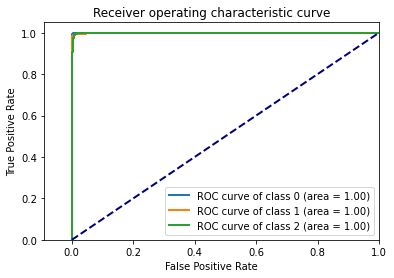

In [64]:
fpr={}
tpr={}
roc_auc=dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarize[:, i], y_pred_prob_xgcl[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0,1], color="navy", lw=lw, linestyle="--")
plt.xlim([-0.09, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic curve")
plt.legend(loc="lower right")
plt.show()


In [ ]:
plt.figure()
lw = 2
for i in range(3):
    plt.plot(
fpr[i],
tpr[i],
color="darkorange",
lw=lw,
label="ROC curve (area = %0.2f)" % roc_auc[i],
)
    
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([-0.09, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic curve")
plt.legend(loc="lower right")
plt.show()


In [65]:
roc_auc

{0: 0.999941664730649, 1: 0.999428996939635, 2: 0.9992490928358113}

In [66]:
classes=np.unique(y_test_sm)

## auc and roc curve for naive bayes

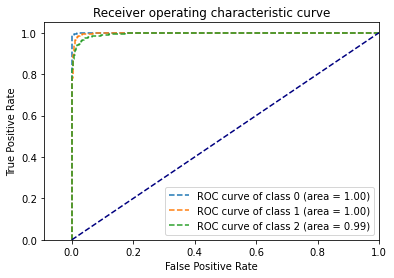

In [67]:
fpr={}
tpr={}
roc_auc=dict()
n_class=y_test_binarize.shape[1]
for i in range(n_class):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarize[:, i], y_pred_prob_naive[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], linestyle="--", label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([-0.09, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic curve")
plt.legend(loc="lower right")
plt.show()

#fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarize.ravel(), y_pred_prob_naive.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


In [ ]:
plt.figure()
lw = 2
i=2
plt.plot(
    fpr[i],
    tpr[i],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[i],
)
    
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([-0.09, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic curve")
plt.legend(loc="lower right")
plt.show()


In [68]:
roc_auc

{0: 0.9998033413627119, 1: 0.9976344518433534, 2: 0.9947146205966411}

## auc roc curve for random forest classifier

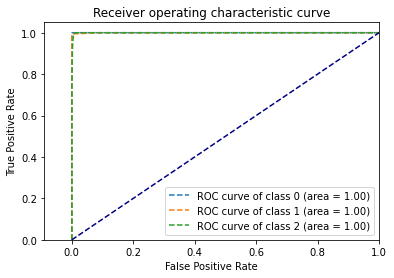

In [69]:
fpr={}
tpr={}
roc_auc=dict()
n_class=y_test_binarize.shape[1]
for i in range(n_class):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarize[:, i], y_pred_prob_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    #plt.plot(fpr[i], tpr[i], linestyle="--", color="darkorange")
    plt.plot(fpr[i], tpr[i], linestyle="--", label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
   
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([-0.09, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic curve")
plt.legend(loc="lower right")
plt.show()

#fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarize.ravel(), y_pred_prob_rf.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
    
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([-0.09, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic curve")
plt.legend(loc="lower right")
plt.show()


In [70]:
roc_auc

{0: 0.9999949052166506, 1: 0.999724942113275, 2: 0.999501750104364}

## From the above 3 algorithms we can conclude that all three algorithms are approximately given similar result

## week 2 tasks

## multiclass svm

In [71]:
from sklearn.svm import SVC
svc=SVC(kernel='linear', C=1.0, class_weight='balanced', random_state=43, probability=True)

In [72]:
y_train_sm

1812     Positive
1369     Positive
5379     Negative
2109     Positive
8616     Negative
           ...   
2064     Positive
10517     Neutral
7985     Negative
2303     Positive
3392     Positive
Name: sentiment, Length: 9813, dtype: object

In [93]:
svc.fit(x_train_sm, y_train_sm)

SVC(class_weight='balanced', kernel='linear', probability=True, random_state=43)

In [94]:
y_pred_svc=svc.predict(x_test_sm)

In [95]:
y_pred_svc_prob=svc.predict_proba(x_test_sm)

In [96]:
confusion_matrix(y_pred_svc, y_test_sm)

array([[1398,    0,    7],
       [   0, 1433,   39],
       [   0,    0, 1329]], dtype=int64)

In [97]:
print(classification_report(y_pred_svc, y_test_sm))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      1405
     Neutral       1.00      0.97      0.99      1472
    Positive       0.97      1.00      0.98      1329

    accuracy                           0.99      4206
   macro avg       0.99      0.99      0.99      4206
weighted avg       0.99      0.99      0.99      4206



## auc-roc curve for multiclass svm

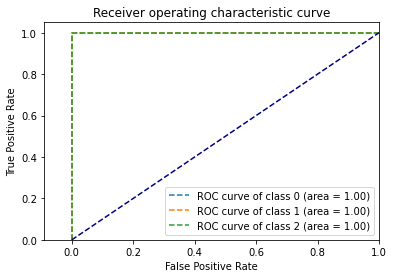

In [102]:
fpr={}
tpr={}
roc_auc=dict()
n_class=y_test_binarize.shape[1]
for i in range(n_class):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarize[:, i], y_pred_svc_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    #plt.plot(fpr[i], tpr[i], linestyle="--", color="darkorange")
    plt.plot(fpr[i], tpr[i], linestyle="--", label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([-0.09, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic curve")
plt.legend(loc="lower right")
plt.show()

In [108]:
master_data.columns

Index(['name', 'brand', 'categories', 'primaryCategories', 'reviews.date',
       'reviews.text', 'reviews.title', 'sentiment', 'sentimemt score',
       'polarity score'],
      dtype='object')

## 2.neural networks

In [122]:
#!pip install textblob

## create neural network

In [33]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, GRU, Activation, Dropout, Embedding, SpatialDropout1D
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelBinarizer

In [187]:
model=Sequential()


In [188]:
model.add(Dense(units=64, activation='relu', input_dim=x_train.shape[1]))

In [189]:
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=3, kernel_initializer='normal', activation='softmax'))

In [190]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                345728    
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 3)                 51        
                                                                 
Total params: 348,387
Trainable params: 348,387
Non-trainable params: 0
_________________________________________________________________


In [191]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [122]:
y_train_binarize=label_binarize(y_train_sm, classes=np.unique(y_train_sm))

In [229]:
model.fit(x_train_sm, y_train_binarize,batch_size=128, epochs=50, verbose=1)

Epoch 1/50
77/77 [==============================] - 0s 5ms/step - loss: 6.7507e-06 - accuracy: 1.0000
Epoch 2/50
77/77 [==============================] - 0s 4ms/step - loss: 6.3709e-06 - accuracy: 1.0000
Epoch 3/50
77/77 [==============================] - 0s 4ms/step - loss: 6.0157e-06 - accuracy: 1.0000
Epoch 4/50
77/77 [==============================] - 0s 4ms/step - loss: 5.6848e-06 - accuracy: 1.0000
Epoch 5/50
77/77 [==============================] - 0s 4ms/step - loss: 5.3798e-06 - accuracy: 1.0000
Epoch 6/50
77/77 [==============================] - 0s 4ms/step - loss: 5.0833e-06 - accuracy: 1.0000
Epoch 7/50
77/77 [==============================] - 0s 4ms/step - loss: 4.8159e-06 - accuracy: 1.0000
Epoch 8/50
77/77 [==============================] - 0s 4ms/step - loss: 4.5538e-06 - accuracy: 1.0000
Epoch 9/50
77/77 [==============================] - 0s 4ms/step - loss: 4.3157e-06 - accuracy: 1.0000
Epoch 10/50
77/77 [==============================] - 0s 3ms/step - loss: 4.0871e-0

In [230]:
y_pred_nn=model.predict(x_test_sm, batch_size=128)
y_pred_bool = np.argmax(y_pred_nn, axis=1)

In [232]:
print(confusion_matrix(y_test_sm_le, y_pred_bool))

[[1398    0    0]
 [   0 1433    0]
 [   3   23 1349]]


In [233]:
print(classification_report(y_test_sm_le, y_pred_bool))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1398
           1       0.98      1.00      0.99      1433
           2       1.00      0.98      0.99      1375

    accuracy                           0.99      4206
   macro avg       0.99      0.99      0.99      4206
weighted avg       0.99      0.99      0.99      4206



## Use possible ensemble techniques like: XGboost + oversampled_multinomial_NB.

In [409]:
from sklearn.ensemble import VotingClassifier

In [410]:
model1=XGBClassifier(n_jobs=-1)
model2=MultinomialNB()

In [411]:
vc=VotingClassifier(estimators=[('xgb',model1),('naaivebayes',model2)], voting='hard', verbose=True, n_jobs=-1)

In [412]:
vc.fit(x_train_sm, y_train_sm)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=-1,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None, ...)),
                             ('naaivebayes', MultinomialNB())],
                 n_jobs=-1, verbose=True)

In [413]:
y_pred_vc=vc.predict(x_test_sm)

In [414]:
confusion_matrix(y_pred_vc, y_test_sm)

array([[1397,    1,   44],
       [   0, 1429,  113],
       [   1,    3, 1218]], dtype=int64)

In [415]:
print(classification_report(y_pred_vc, y_test_sm))

              precision    recall  f1-score   support

    Negative       1.00      0.97      0.98      1442
     Neutral       1.00      0.93      0.96      1542
    Positive       0.89      1.00      0.94      1222

    accuracy                           0.96      4206
   macro avg       0.96      0.96      0.96      4206
weighted avg       0.97      0.96      0.96      4206



## Prepare a column called 'Sentiment Score or polarity score'

In [38]:
from textblob import TextBlob

In [39]:
def senti(x):
    return TextBlob(x).sentiment 
def polarity(x):
    return TextBlob(x).polarity+1

In [40]:
#master_data['sentimemt_score']=master_data['reviews.text'].apply(lambda x: (TextBlob(x).sentiment))
#master_data['polarity_score']=master_data["reviews.text"].apply(lambda x: (TextBlob(x).polarity))

In [41]:
master_data['sentiment_score']=master_data['reviews.text'].apply(senti)
master_data['polarity_score']=master_data['reviews.text'].apply(polarity)

In [50]:
#master_data.drop(['sentimemt_score','polarity_score'], axis=1, inplace=True)

In [42]:
master_data=master_data.reset_index(drop=True) ##very important

In [43]:
master_data.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment,sentiment_score,polarity_score
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive,"(0.36354166666666665, 0.6791666666666667)",1.363542
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive,"(0.45821428571428574, 0.49821428571428567)",1.458214
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral,"(-0.14047619047619045, 0.21428571428571427)",0.859524
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive,"(0.69, 0.6033333333333335)",1.690000
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive,"(0.1875, 0.2916666666666667)",1.187500


In [44]:
master_data.sentiment_score.head()

0      (0.36354166666666665, 0.6791666666666667)
1     (0.45821428571428574, 0.49821428571428567)
2    (-0.14047619047619045, 0.21428571428571427)
3                     (0.69, 0.6033333333333335)
4                   (0.1875, 0.2916666666666667)
Name: sentiment_score, dtype: object

In [45]:
master_data['polarity_score'].shape, XX.shape

((4987,), (4987, 6793))

In [46]:
master_data.isna().sum()

name                 0
brand                0
categories           0
primaryCategories    0
reviews.date         0
reviews.text         0
reviews.title        0
sentiment            0
sentiment_score      0
polarity_score       0
dtype: int64

In [47]:
data= pd.concat([master_data['polarity_score'],XX], axis=1)

In [48]:
Y=le.fit_transform(master_data['sentiment'])

In [49]:
new_x_train,new_x_test,y_train,y_test=train_test_split(data,Y, test_size=0.3, random_state=43)

In [61]:
model3=MultinomialNB()

In [62]:
model3.fit(new_x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MultinomialNB()

In [63]:
print(confusion_matrix(model3.predict(new_x_test), y_test))

[[   0    0    0]
 [   0    0    0]
 [  37   52 1408]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [64]:
print(classification_report(model3.predict(new_x_test), y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.94      0.97      1497

    accuracy                           0.94      1497
   macro avg       0.33      0.31      0.32      1497
weighted avg       1.00      0.94      0.97      1497



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined 

In [94]:
new_data=pd.concat([master_data['polarity_score'], X], axis=1)

In [96]:
new_x_train,new_x_test,y_train,y_test=train_test_split(new_data,Y, test_size=0.3, random_state=43)

## from above scenario it is showing poor performance if senti_score including in data

## LSTM MODEL

In [97]:
epochs = 4
emb_dim = 64
batch_size = 256
model = Sequential()
model.add(Embedding(75, emb_dim, input_length=new_x_train.shape[1]))
#model.add(SpatialDropout1D(0.7))
model.add(LSTM(16, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(3, activation='softmax'))

In [44]:
#lstm=Sequential()

In [ ]:
#lstm.add((LSTM(64, dropout=0.2, recurrent_dropout=0.3)))

In [130]:
#lstm.add(Dense(units=3, kernel_initializer='normal', activation='softmax'))

In [98]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 5402, 64)          4800      
                                                                 
 lstm_2 (LSTM)               (None, 16)                5184      
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 10,035
Trainable params: 10,035
Non-trainable params: 0
_________________________________________________________________


In [99]:
y_train_binarize=label_binarize(y_train, classes=[0,1,2])

In [100]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [101]:
new_x_train.shape, y_train_binarize.shape

((3490, 5402), (3490, 3))

In [103]:
model.fit(new_x_train, y_train_binarize, batch_size=64, epochs=epochs, verbose=2)

Epoch 1/4
55/55 - 1576s - loss: 0.7044 - accuracy: 0.8693 - 1576s/epoch - 29s/step
Epoch 2/4
55/55 - 3020s - loss: 0.2869 - accuracy: 0.9355 - 3020s/epoch - 55s/step
Epoch 3/4
55/55 - 1905s - loss: 0.2825 - accuracy: 0.9355 - 1905s/epoch - 35s/step
Epoch 4/4
55/55 - 1566s - loss: 0.2826 - accuracy: 0.9355 - 1566s/epoch - 28s/step


In [104]:
y_pred_lstm=model.predict(new_x_test)

In [105]:
y_pred_lstm_max=np.argmax(y_pred_lstm, axis=1)

In [113]:
print(confusion_matrix(y_pred_lstm_max, y_test))

[[   0    0    0]
 [   0    0    0]
 [  37   52 1408]]


In [114]:
print(classification_report(y_pred_lstm_max, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.94      0.97      1497

    accuracy                           0.94      1497
   macro avg       0.33      0.31      0.32      1497
weighted avg       1.00      0.94      0.97      1497



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## GRU MODEL

In [120]:
epochs = 3
model1 = Sequential()
model1.add(Embedding(100, 128, input_length=new_x_train.shape[1]))
model1.add(SpatialDropout1D(0.7))
model1.add(GRU(32, dropout=0.3, recurrent_dropout=0.3))
model1.add(Dense(3, activation='softmax'))

In [121]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [125]:
hist=model.fit(new_x_train, y_train_binarize, batch_size=64, epochs=epochs, verbose=2)

Epoch 1/3
55/55 - 1565s - loss: 0.2823 - accuracy: 0.9355 - 1565s/epoch - 28s/step
Epoch 2/3
55/55 - 1599s - loss: 0.2825 - accuracy: 0.9355 - 1599s/epoch - 29s/step
Epoch 3/3
55/55 - 1560s - loss: 0.2823 - accuracy: 0.9355 - 1560s/epoch - 28s/step


In [126]:
y_pred_gru=model1.predict(new_x_test)

In [127]:
y_pred_gru_max=np.argmax(y_pred_gru, axis=1)

In [129]:
print(confusion_matrix(y_pred_gru_max, y_test))

[[  37   52 1408]
 [   0    0    0]
 [   0    0    0]]


In [131]:
print(classification_report(y_pred_gru_max, y_test))

              precision    recall  f1-score   support

           0       1.00      0.02      0.05      1497
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.02      1497
   macro avg       0.33      0.01      0.02      1497
weighted avg       1.00      0.02      0.05      1497



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## for both LSTM and GRU its not showing good performance.Some how neural network (ANN) showing good result. 

In [ ]:
#import tensorflow as tf
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

## clustering

In [106]:
from sklearn.cluster import KMeans
km3=KMeans(n_clusters=3, random_state=43)

In [116]:
tf_idf3=TfidfVectorizer(max_features=2500, stop_words="english")

In [117]:
km3.fit(tf_idf3.fit_transform(master_data['reviews.text']))

KMeans(n_clusters=3, random_state=43)

In [118]:
rev=tf_idf3.fit_transform(master_data['reviews.text'])

In [119]:
words=tf_idf3.get_feature_names()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


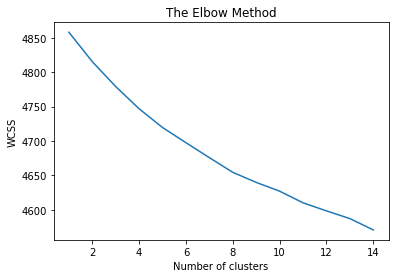

In [124]:
wcss = []
for i in range(1,15):
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=43)
    km.fit(rev)
    wcss.append(km.inertia_)
plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## lets check k values 9, 10, 11

In [120]:
km9=KMeans(n_clusters=9,init='k-means++',max_iter=300,n_init=10,random_state=43)
km9.fit(rev)

KMeans(n_clusters=9, random_state=43)

In [121]:
km10=KMeans(n_clusters=10,init='k-means++',max_iter=300,n_init=10,random_state=43)
km10.fit(rev)

KMeans(n_clusters=10, random_state=43)

In [122]:
km11=KMeans(n_clusters=11,init='k-means++',max_iter=300,n_init=10,random_state=43)
km11.fit(rev)

KMeans(n_clusters=11, random_state=43)

In [123]:
km9.inertia_, km10.inertia_, km11.inertia_

(4639.941742907345, 4627.213619830506, 4610.288669184534)

In [125]:
np.unique(km9.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([1636,  297,  248,  538,  664,  386,  404,  424,  390], dtype=int64))

In [126]:
km9.cluster_centers_.shape

(9, 2500)

In [186]:
#most common words
how_many_words=25
common_words = km9.cluster_centers_.argsort()[:,-1:-how_many_words:-1]
for i, word_index in enumerate(common_words):
    print(str(i), ":", ",".join(words[i] for i in word_index))

0 : love,bought,like,product,gift,good,use,books,just,kids,really,read,got,buy,amazon,device,games,screen,christmas,purchased,better,best,time,loved
1 : loves,daughter,bought,gift,grandson,tablet,son,wife,absolutely,easy,granddaughter,great,purchased,got,christmas,birthday,use,games,kindle,nephew,mother,uses,durable,price
2 : old,year,loves,bought,tablet,perfect,games,son,easy,grandson,great,got,granddaughter,yr,purchased,use,love,apps,play,christmas,years,durable,daughter,kids
3 : great,works,price,product,tablet,kids,love,recommend,buy,reading,battery,little,gift,best,life,sound,use,just,good,features,bought,value,like,amazon
4 : tablet,good,price,apps,kids,amazon,great,use,love,play,games,perfect,need,nice,like,store,little,bought,works,time,google,just,screen,size
5 : alexa,love,music,great,lights,home,ask,echo,questions,fun,things,just,family,like,house,use,amazon,speaker,äôs,turn,having,screen,able,smart
6 : echo,plus,dot,love,great,amazon,music,sound,home,video,like,screen,smart

## we can see kmeans is showing different perspective in clustering as most of data is positive reviews its showing different perspective in that positive reviews


## cluster visualization

In [130]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2, random_state=43)

In [188]:
reduced_features=pca.fit_transform(rev.toarray())
reduced_cluster_centers=pca.transform(km9.cluster_centers_)

In [189]:
reduced_cluster_centers

array([[-0.02497945, -0.0418664 ],
       [ 0.19996287, -0.06645549],
       [ 0.23239462, -0.07205568],
       [-0.02652184,  0.12503976],
       [ 0.04580762,  0.01326043],
       [-0.12141573, -0.04448279],
       [-0.13909127, -0.03259267],
       [-0.01366029, -0.0525048 ],
       [ 0.04242908,  0.21185648]])

In [190]:
reduced_features.shape

(4987, 2)

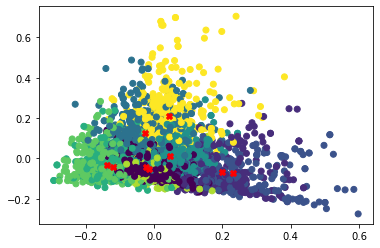

In [191]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=km9.predict(rev))
plt.scatter(reduced_cluster_centers[:,0], reduced_cluster_centers[:,1], marker="X", c="r")

## topic modelling

## in topic modelling we use 2 famous models
## 1. NMF(Non-Negative Matrix Factorixation)

In [151]:
from sklearn.decomposition import NMF
nmf=NMF(n_components=4, random_state=43)

In [152]:
nmf.fit(rev)

NMF(n_components=4, random_state=43)

In [161]:
top_words=26
common_words = nmf.components_.argsort()[:,-1:-top_words:-1]
for i, word_index in enumerate(common_words):
    print(str(i), ":", ",".join(words[i] for i in word_index))

0 : great,tablet,price,good,product,works,kids,recommend,apps,little,buy,reading,nice,amazon,quality,sound,battery,best,value,need,features,size,does,just,like
1 : loves,bought,old,year,tablet,daughter,gift,son,grandson,christmas,games,purchased,got,granddaughter,perfect,wife,absolutely,kindle,birthday,uses,play,loved,mom,yr,enjoys
2 : easy,use,set,product,setup,read,navigate,fun,super,light,fast,kindle,books,recommend,lightweight,convenient,really,purchased,size,happy,day,simple,reader,item,ease
3 : love,echo,alexa,kindle,music,amazon,like,screen,just,home,plus,new,play,best,read,sound,device,better,smart,family,books,lights,kids,really,things


## in above scenario tha 4 topics we can see some difference not too much but somehow a variation in topics like positive review, gifts, music and so on

## 2.Latent Dirichlet Allocation

In [159]:
from sklearn.decomposition import LatentDirichletAllocation
lda=LatentDirichletAllocation(n_components=5, random_state=43)

In [160]:
lda.fit(rev)

LatentDirichletAllocation(n_components=5, random_state=43)

In [158]:
top_words=25
common_words = lda.components_.argsort()[:,-1:-top_words:-1]
for i, word_index in enumerate(common_words):
    print(str(i), ":", ",".join(words[i] for i in word_index))

0 : kindle,read,books,love,tablet,reading,great,battery,ipad,easy,screen,reader,use,good
1 : echo,great,love,alexa,amazon,product,use,fun,best,easy,tablet,sound,things,set
2 : echo,alexa,music,great,like,love,use,home,amazon,just,screen,sound,good,works
3 : tablet,loves,great,easy,bought,use,kids,old,love,year,gift,price,product,games


## LDA showing different perspective topics in data

## with smote data

In [164]:
X_sm, y_sm=sm.fit_resample(rev,master_data['sentiment'])

In [169]:
nmf=NMF(n_components=5, random_state=43)
nmf.fit(X_sm)

NMF(n_components=5, random_state=43)

In [170]:
top_words=26
common_words = nmf.components_.argsort()[:,-1:-top_words:-1]
for i, word_index in enumerate(common_words):
    print(str(i), ":", ",".join(words[i] for i in word_index))

0 : device,work,echo,just,use,great,screen,alexa,like,buy,amazon,does,product,bought,love,needs,sound,friendly,easy,make,phone,things,don,home,kindle
1 : ok,year,pay,old,happy,bought,charge,tablet,charger,need,loves,christmas,price,considering,daughter,order,defective,space,time,grandson,quality,account,best,charging,port
2 : week,update,customer,constantly,weak,grows,resolved,promises,junk,poorly,lowest,magnetic,pieces,designed,kindle,means,old,services,oasis,upgrade,setting,battery,life,better,lights
3 : good,tablet,apps,download,slow,kids,amazon,reading,store,price,games,app,great,play,kindle,books,browser,little,google,fan,disappointed,internet,catch,movies,camera
4 : returned,apps,proprietary,worthless,did,basically,cause,install,liked,store,daughter,chrome,cheap,run,product,google,answers,stuff,really,confusing,like,use,owning,ads,navigate


## after balancing it showing different topics like in 3rd and 5th it showing negative reviews and 1st somewhat like neutral reviews etc..

In [176]:
lda=LatentDirichletAllocation(n_components=4, random_state=43)
lda.fit(X_sm)

LatentDirichletAllocation(n_components=4, random_state=43)

In [177]:
top_words=25
common_words = lda.components_.argsort()[:,-1:-top_words:-1]
for i, word_index in enumerate(common_words):
    print(str(i), ":", ",".join(words[i] for i in word_index))

0 : slow,tablet,good,ok,device,ipad,like,amazon,bad,friendly,pay,children,don,didn,tablets,reading,work,works,apps,internet,old,better,time,know
1 : apps,amazon,tablet,good,echo,screen,alexa,just,work,does,use,kids,device,video,update,ads,download,kindle,better,needs,lots,limited,make,like
2 : charge,bought,store,just,kindle,old,tablet,charger,google,play,apps,great,going,year,returned,wish,answers,instructions,shuts,paper,cheap,use,problem,tried
3 : great,tablet,product,easy,use,loves,love,kindle,good,returned,price,sound,really,son,kids,bought,available,apps,disappointed,daughter,gift,works,quality,did


## clustering

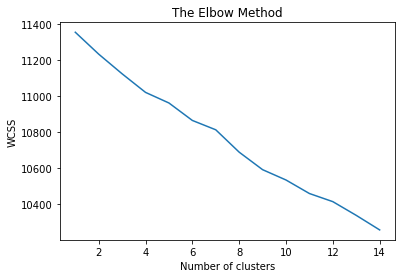

In [178]:
wcss = []
for i in range(1,15):
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=43)
    km.fit(X_sm)
    wcss.append(km.inertia_)
plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [184]:
km4=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=43)
km4.fit(X_sm)

KMeans(n_clusters=3, random_state=43)

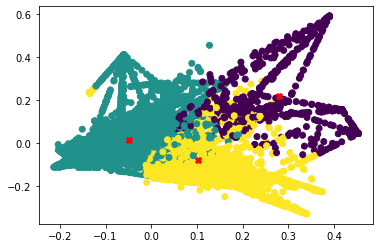

In [185]:
reduced_features=pca.fit_transform(X_sm.toarray())
reduced_cluster_centers=pca.transform(km4.cluster_centers_)
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=km4.predict(X_sm))
plt.scatter(reduced_cluster_centers[:,0], reduced_cluster_centers[:,1], marker="X", c="r")

## as we know we have three types of reviews positive, negative and neutral.
## and as this one is balanced data all three clusters showing equal distribution